In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/breast_cancer_survival.csv')
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop(columns=['Patient_Status'])
y = data['Patient_Status']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.734375


In [22]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       Alive       0.78      0.92      0.85        51
        Dead       0.00      0.00      0.00        13

    accuracy                           0.73        64
   macro avg       0.39      0.46      0.42        64
weighted avg       0.62      0.73      0.67        64



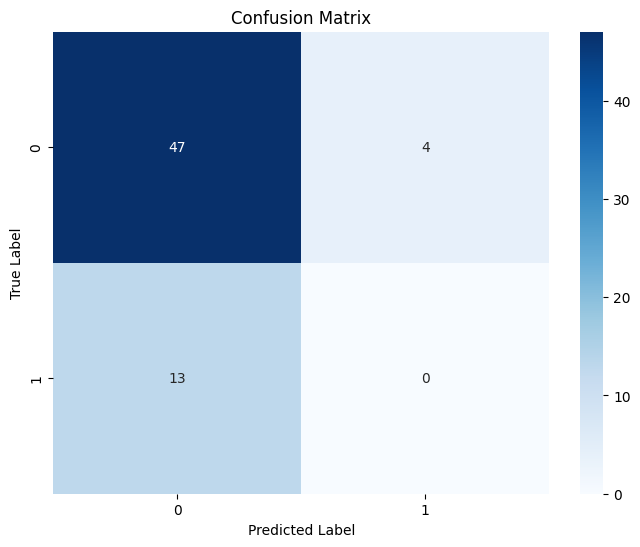

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


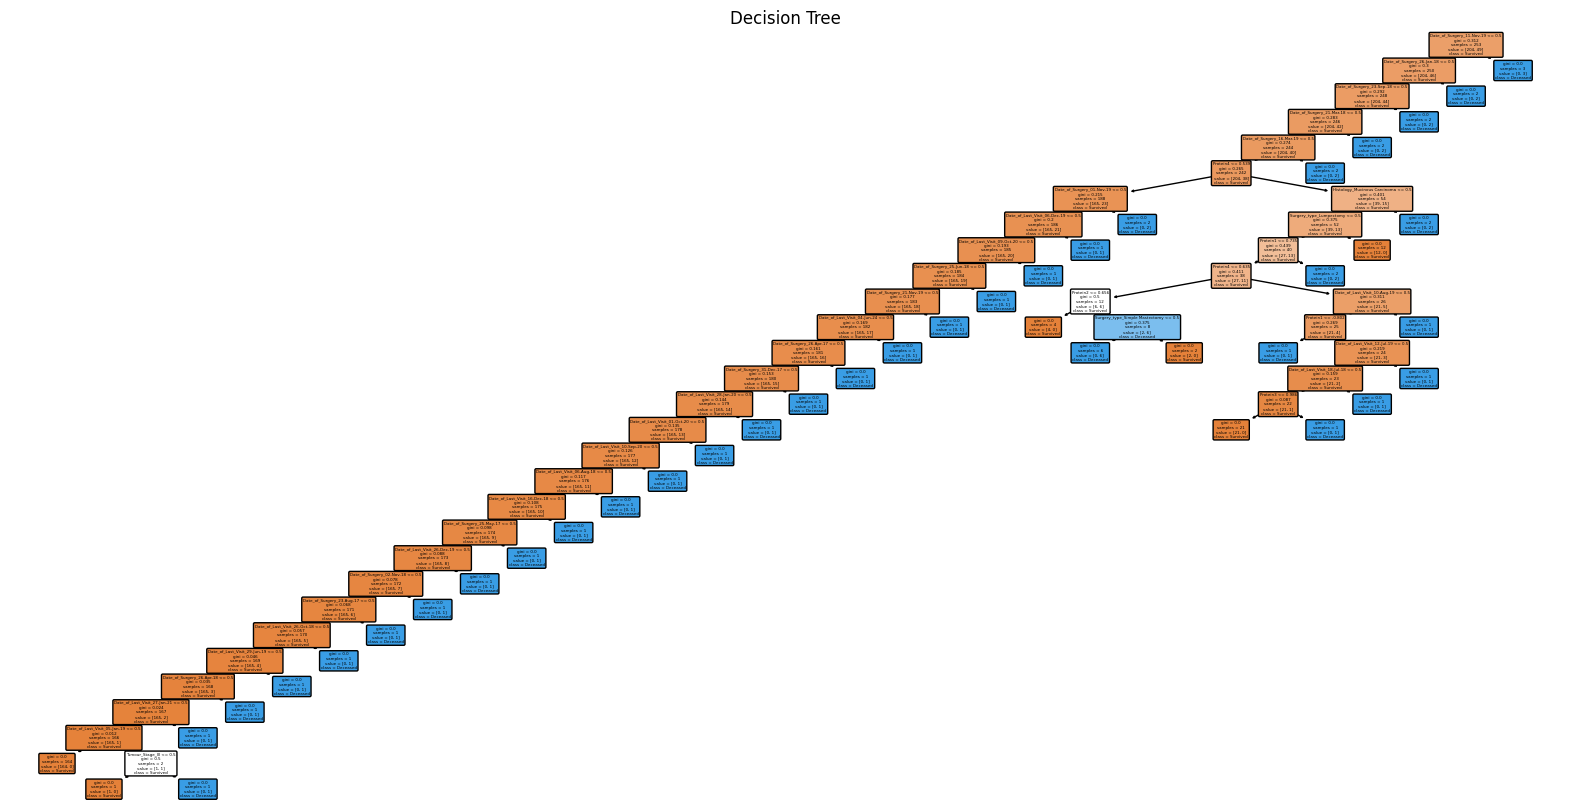

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Survived', 'Deceased'], rounded=True)
plt.title("Decision Tree")
plt.show()
